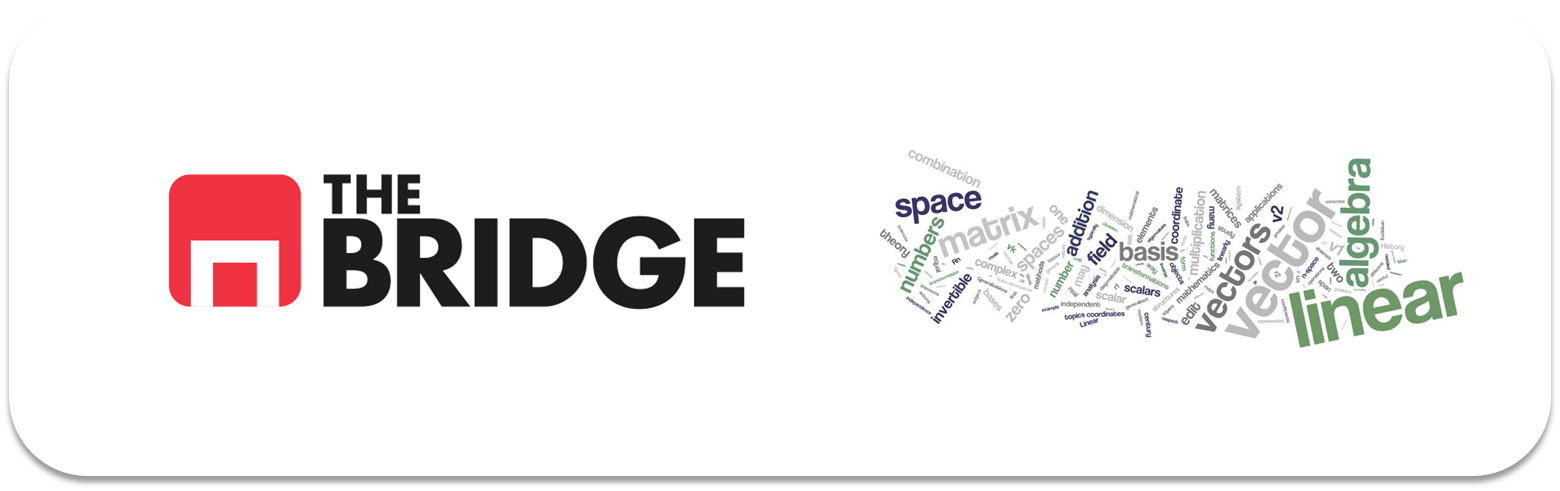

# Clases Extraescolares: Vectores

## Contenidos

* [Caracterizacion](#Caracterizacion)  

* [Vectores](#Vectores)  

* [Vectores aplicados al problema: representación gráfica](#Vectores-aplicados-al-problema:-representación-gráfica)  

* [Vectores aplicados al problema: Distancia entre vectores](#Vectores-aplicados-al-problema:-Distancia-entre-vectores)  

* [Solución utilizando distancias](#Solución-utilizando-distancias)  



Recordemos que en la sesión anterior dejamos a la profesora Dena Aidone justo después de haber realizado la encuesta a sus alumnos y todavía pendiente de resolver el problema que le había planteado la dirección: asignar los alumnos a cada clase extraescolar. Recordemos la última imagen.

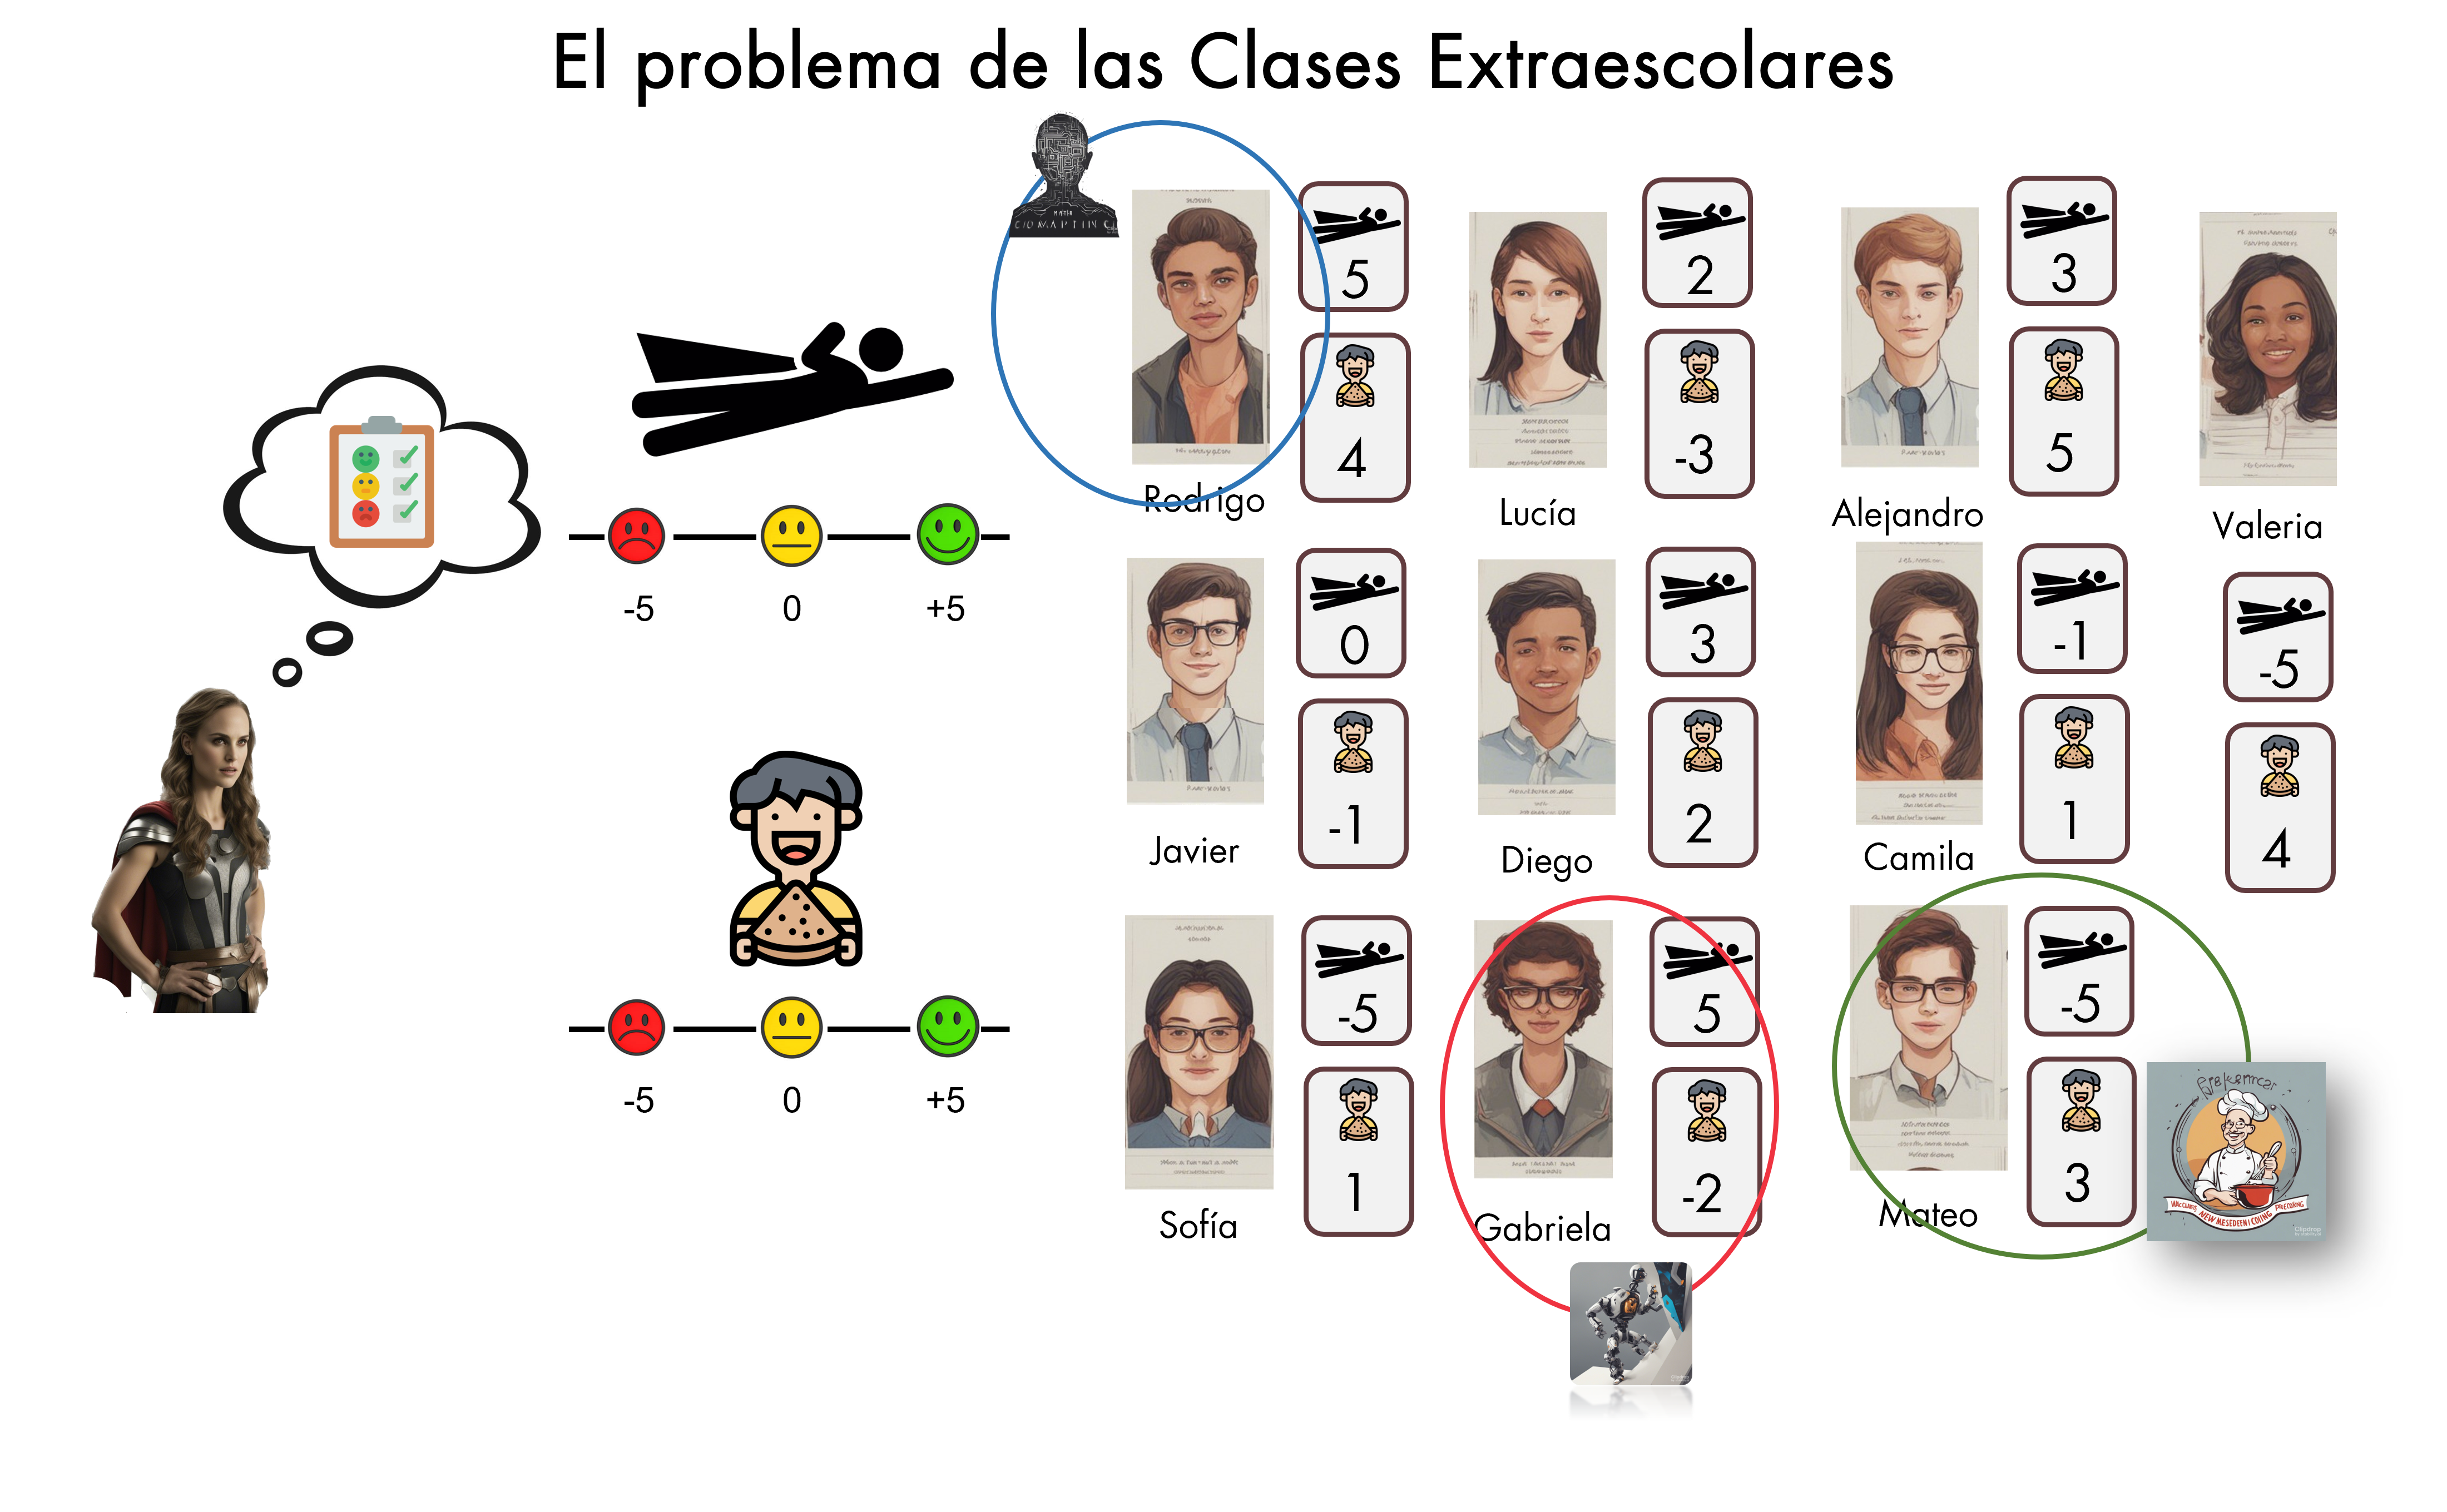

### Caracterizacion
  

[al indice](#Contenidos)  


Lo primero que ha hecho Dena Aidone es lo que se denomina caracterizar los elementos del problema. Cada alumno ha pasado a ser una lista de valores. ¡Los ha convertido en datos!.En este caso su preferencia por volar y por comer. 
Y ahora puede jugar con esos datos para resolver su problema.

In [1]:
#convertir esos datos -> etiquetas y valores -> diccionario
alumnos_aidone = {
    "Rodrigo":[5,4],
    "Lucía":[2,-3],
    "Alejandro":[3,5],
    "Valeria": [-5,4],
    "Javier":[0,-1],
    "Camila":[3,2],
    "Diego":[-1,1],
    "Gabriela":[5,-2],
    "Mateo":[-5,3],
    "Sofia":[-5,1]
}


Ya podemos intentar buscar algún detalle, algún que nos permita crear hipótesis. 
¿Qué podemos observar respecto a los datos que llamen nuestra atención?

La profesora Aidone se fijó en los valores de los tres alumnos que habían escogido voluntariamente... ¿Qué tienen de especial? 

Eso es todos tienen algún valor extremo y además son diferentes entre los tres. Rodrigo le gusta volar y comer, a Gabriela sólo volar y muy poco comer y a Mateo nada volar y bastante comer... 

Y a la profesora se le ocurrió que podría agrupar a los alumnos según se parecieran sus valores a los de las características de estos. Aquellos alumnos y alumnas que se pareciesen a Rodrigo a CAI, al cine por AI, quien que se pareciesen a Gabriela a escalar con Robots y lo mismo con Mateo para la cocina.




Está perfecto, pero ¿cómo se define ser similar o parecido? ... y aquí viene el algebra a echarnos una mano. 

### Vectores  

[al indice](#Contenidos)  



La definición estricta de **un vector** es la de una **entidad matemática** que tiene tanto magnitud (o longitud) como dirección. Lo cual permite representarlo gráficamente y algebráicamente.

No te pierdas, desde un punto de vista algebraico un vector es una serie o lista de valores... Sí, eso, lo que acabamos de asignar a cada alumno es un vector... Un lista. Y ojo, quedate con ello, porque algebráicamente un vector tiene valores numéricos pero en el contexto de datos y data science un vector es una lista ordenada de valores de cualquier tipo que caracterizan a una cosa, entidad, lo que sea que estemos tratando.

Por completitud, que sepas que existen dos tipos de *vectores*, los *vectores de fila* y los *vectores de columna*. Podemos representarlos matemáticamente de la siguiente manera, dónde *f* es un vector de fila y *c* es un vector de columna:
$$f=\begin{bmatrix}0&1&-1\end{bmatrix}   \\ \\
c=\begin{bmatrix}0\\1\\-1\end{bmatrix}$$


### Vectores aplicados al problema: representación gráfica  

[al indice](#Contenidos)  



Muy bien, dirás, pero ¿y a la profesora de qué le sirve esto?

Lo primero porque los vectores se pueden representar gráficamente y eso nos va a facilitar encontrar ese concepto de "parecidos" o "próximos"

In [2]:
import matplotlib.pyplot as plt
from warnings import filterwarnings

%matplotlib inline
filterwarnings('ignore') # Ignorar warnings

In [3]:
def move_spines():
    """Crea la figura de pyplot y los ejes. Mueve las lineas de la izquierda y de 
    abajo para que se intersecten con el origen. Elimina las lineas de 
    la derecha y la de arriba. Devuelve los ejes."""
    fix, ax = plt.subplots()
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_position("zero")
    
    for spine in ["right", "top"]:
        ax.spines[spine].set_color("none")
    
    return ax

def vect_fig(*vectores):  # Fijate que vamos a emplear argumentos variables
    #para poder dibujar los vectores que queramos
    """Genera el grafico de los vectores en el plano"""
    ax = move_spines()
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid()
    vecs = [vector for vector in vectores] # lista de vectores
    for v in vecs:
        ax.annotate(" ", xy=v, xytext=[0, 0],
                   arrowprops=dict(facecolor="blue",
                                  shrink=0,
                                  alpha=0.7,
                                  width=0.5))
        ax.text(1.1 * v[0], 1.1 * v[1], v)

Por ejemplo, pintemos los vectores que representan a Rodrigo, Gabriela y Mateo, nuestros alumnos "prototipo" (por haber escogido cada uno una clase determinada) y además de Lucia, para entender cómo vamos a solucionar nuestro problema

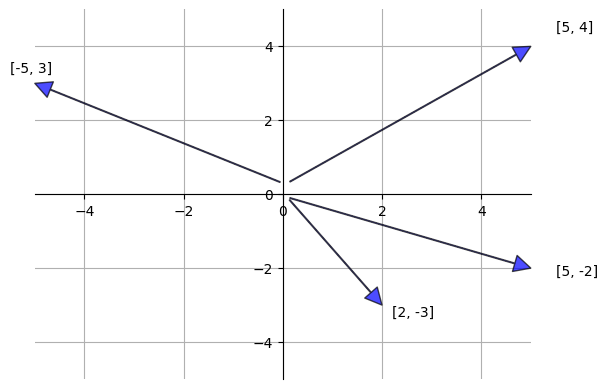

In [6]:
vect_fig(alumnos_aidone["Rodrigo"],alumnos_aidone["Gabriela"],alumnos_aidone["Mateo"],alumnos_aidone["Lucía"])

Hmmm, parece claro que Lucia se asemeja más a, o ESTA MAS CERCA DE, Gabriela que al resto y nuestra decisión sería enviarla a las clases de Escalada con Robot. 

Pues ya está, ¿verdad?, con hacer esto con el resto de alumnos y así a ojo decidir tendríamos seleccioanada la clase para cada uno y seguramente acertaríamos en muchos.

Pero la ídea es precisamente hacerlo de forma que si nos cambian los datos o nuestra clase cambie no tengamos que hacerlo nosotros a ojo...

Podemos aprovechar dos operaciones básicas con vectores para poder saber quién está más cerca o se parece más a quién:
* La distancia entre vectores 
* El producto escalar.


### Vectores aplicados al problema: Distancia entre vectores  

[al indice](#Contenidos)  



La distancia (euclídea) entre dos vectores es la longitud del segmento que une sus vértices o, con cierto rigor, el módulo del vector diferencia. Veámoslo en la figura:

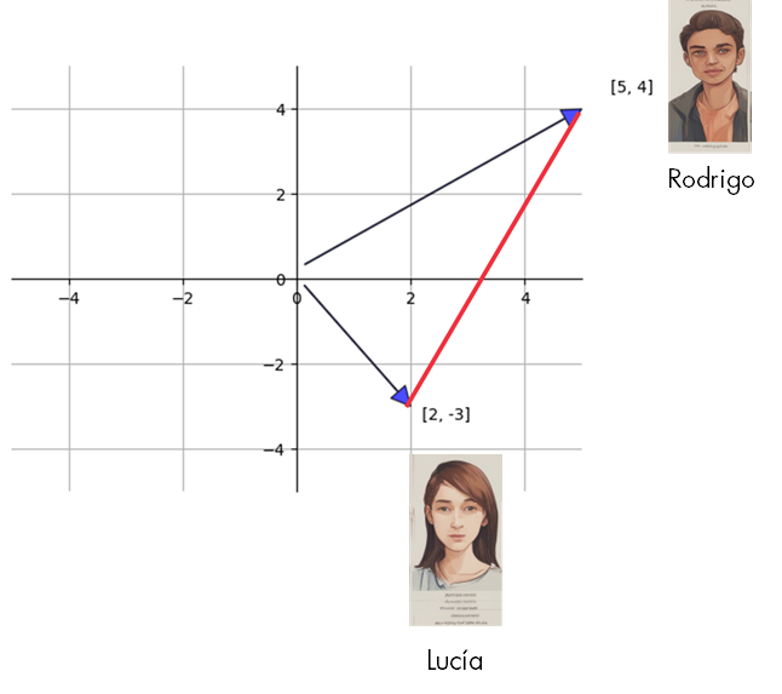

La distancia entre el vector [5,4] (Rodrigo) y el vector [2,-3] (Lucia) es la longitud del segmento rojo y se obtiene aplicando la fórmula:

$$d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$$
         

Donde, $[x_1,y_1]$ son los valores o coordenadas del primer vector y $[x_2, y_2]$ los valores del segundo vector [Fijate en que el orden de aplicación de los vectores no cambia el resultado]. En el caso de la figura:  

* $x_1$ = 5,  $y_1$ = 4
* $x_2$ = 2,  $y_2$ = -3

Pues ya tenemos la primera forma de solucionar nuestro problema, la profesora Aidone calculará las distancias de los vectores que representan a cada uno de los alumnos a cada uno de los alumnos de referencia (Rodrigo, Gabriela y Mateo) y asignará la clase que corresponda a aquel alumno de referencia cuya distancia sea menor

¿Qué necesitamos? Lo primero una función que nos calcule la distancia entre dos vectores... Construyámosla, recuperando nuestra "olvidada" librería **math**

In [9]:
import math

def distancia_2d(v1,v2,precision = 2):
    suma = 0
    for indice_componente in range(2):
        suma += (v1[indice_componente]- v2[indice_componente])**2
    distancia = math.sqrt(suma)
    distancia = round(distancia,precision)
    return distancia

Y la probamos con los Lucia y los alumnos de referencia (Rodrigo, Gabriela y Mateo):

In [11]:

vec_lucia = alumnos_aidone["Lucía"]
for alumnos_ref in ["Rodrigo","Gabriela","Mateo"]:
    vec_ref = alumnos_aidone[alumnos_ref]
    distancia = distancia_2d(vec_lucia,vec_ref)
    print(f"Distancia de Lucia a {vec_ref} es de {distancia}")

Distancia de Lucia a [5, 4] es de 7.62
Distancia de Lucia a [5, -2] es de 3.16
Distancia de Lucia a [-5, 3] es de 9.22


Sobre el gráfico de vectores

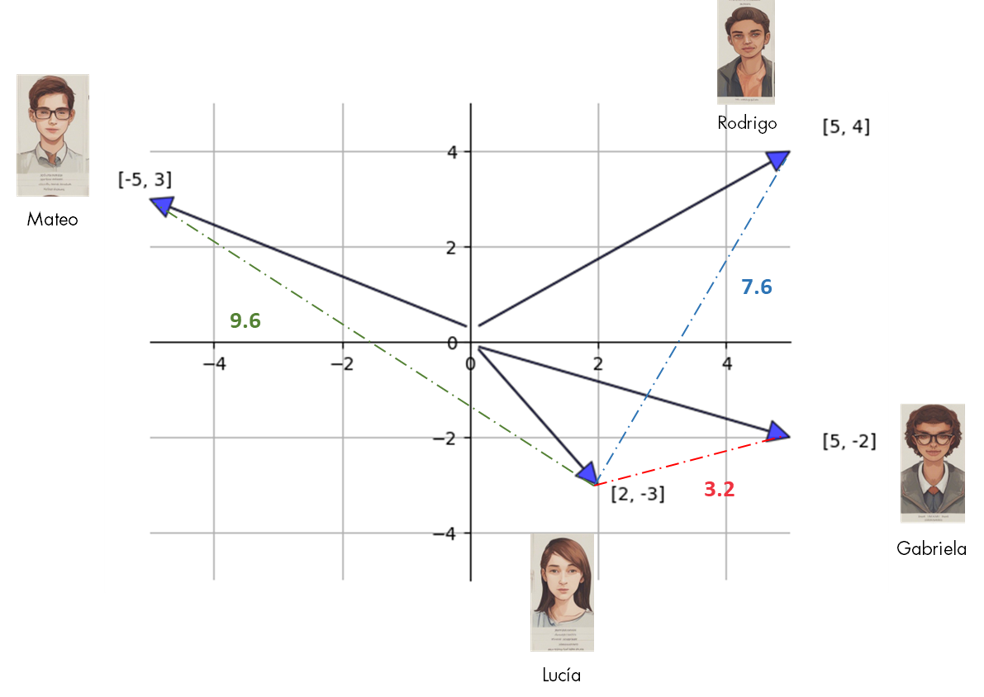

Perfecto, ya lo intuíamos, pero ahora tenemos una forma "numérica" y por tanto comparable y ordenable de saber cuanto de similares o próximos están las preferencias de un alumno a otro

Además la profesor Aidone se dio cuenta de otra cosa, no sólo podía asignar a cada alumno sino que...

### Solución utilizando distancias  

[al indice](#Contenidos)  



Habiendo creado la función de distancias la solución al problema de asignación era hacerse un programa de comparación... Os lo dejo aquí para que lo repasemos

In [12]:
alumnos_ref = ["Rodrigo","Gabriela","Mateo"]
curso_asignado = ["CAI","ER","NMPC"]
diccionario_reparto = {}

for alumno, vector in alumnos_aidone.items(): # Recorremos el diccionario donde tenemos el vector que caracteriza 
    # cada alumno
    
    distancia_minima = 99999999 # Por ahora cualquier distancia a los 
    #alumons de referencia es buena
    
    indice_distancia_minima = -1 # Tenemos un indice al curso-alumno de referencia
    diccionario_reparto[alumno] = {"distancias": [], "curso_elegido": ""}
    # Creamos una colección, un diccionario para almacenar los resultados

    for indice_curso,alumno_ref in enumerate(alumnos_ref): # Y ahora el bucle para 
        # calcular la distancia a los vectores de los alumnos de referencia
        vec_ref = alumnos_aidone[alumno_ref] # Recuperamos el vector que 
        # caracteriza al alumno de referencia
        
        distancia = distancia_2d(vector, vec_ref, 1) # Obtenemos la distancia 
        # con el alumno del bucle principal
        if distancia < distancia_minima: # Y vemos si es menor que #
            # la distancia mínima última para el alumno del bucle principal
            distancia_minima = distancia # Si lo es, actualizamos 
            #la nueva distancia mínima
            indice_distancia_minima = indice_curso # Y actualizamos 
            # el indice del curso escogido
        
        diccionario_reparto[alumno]["distancias"].append(distancia) 
        # en cualquier caso me guardo la distancia calculada...
        diccionario_reparto[alumno]["curso_elegido"] = \
        curso_asignado[indice_distancia_minima] # Traduzo el indice del curso al curso
    print(f"Para {alumno}, el curso asignado es " + \
          f"{diccionario_reparto[alumno]['curso_elegido']}") # Y vamos volcando 
        # la elección de nuestro algoritmo


Para Rodrigo, el curso asignado es CAI
Para Lucía, el curso asignado es ER
Para Alejandro, el curso asignado es CAI
Para Valeria, el curso asignado es NMPC
Para Javier, el curso asignado es ER
Para Camila, el curso asignado es CAI
Para Diego, el curso asignado es NMPC
Para Gabriela, el curso asignado es ER
Para Mateo, el curso asignado es NMPC
Para Sofia, el curso asignado es NMPC


Ahí lo tenemos, un reparto sin molestar. Podemos hacer una comprobación de consistencia... Que los alumnos de referencia estén en el curso que escogieron

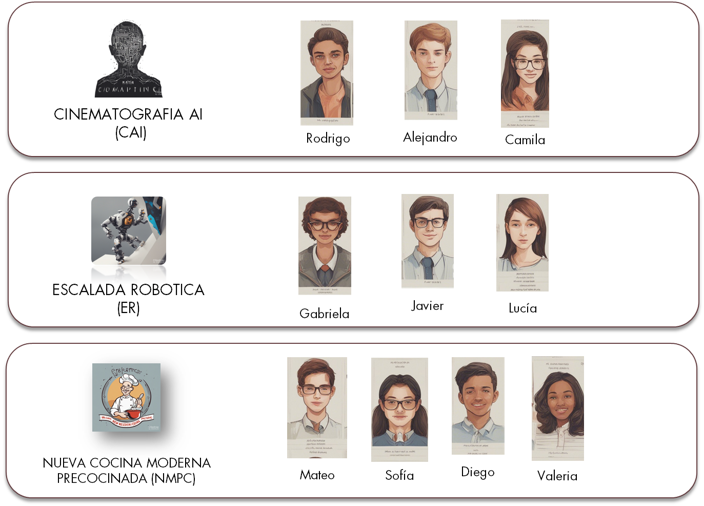

Así es y parece que es una clase con una ligera preferencia por la cocina... pues muy bien ya tenemos ***un algoritmo*** que nos da una solución (y de regalo nos guarda las distancias, por si acaso...)